In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#load data
data = pd.read_csv('scaled_data.csv')

#split data into train and test sets
train, test = train_test_split(data, test_size=0.3)


X_train = train.iloc[:,np.r_[0,2:15]]
y_train = train.iloc[:,1]
X_test = test.iloc[:,np.r_[0,2:15]]
y_test = test.iloc[:,1]


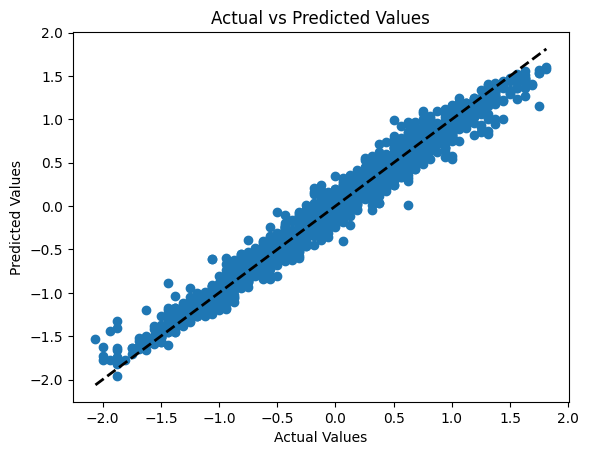

# MODEL

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor()

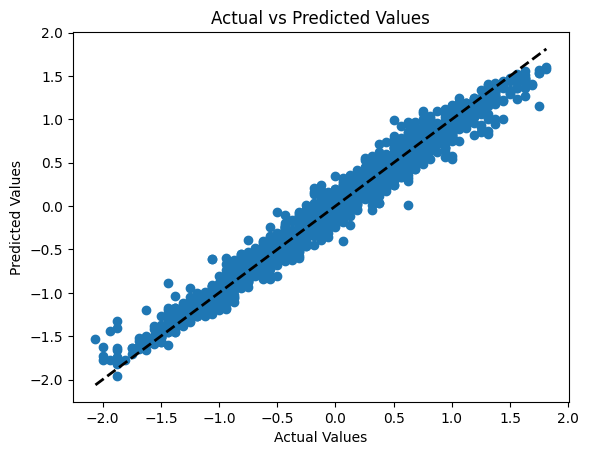

In [9]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line for perfect correlation. This serves as a reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

# Evaluation

In [6]:
# Performance Metrics
from sklearn import metrics

y_pred = model.predict(X_test)

metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, y_pred),
metrics.mean_squared_error (y_test, y_pred),
np.sqrt (metrics.mean_squared_error (y_test, y_pred)),
metrics.explained_variance_score (y_test, y_pred)]}).round(6)
print(metrics_df)

      Metric     Value
0        MAE  0.087340
1        MSE  0.014003
2       RMSE  0.118336
3  R-Squared  0.973327
